# CNN with CIFAR - 10 datasets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf

In [2]:
nowtime = time.strftime('%Y-%m-%d')
nowtime

'2023-11-20'

#### 啟動GPU進行運算

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
gpus = tf.config.list_physical_devices('GPU')
#if len(gpus>0):
    #gpus[0] = True
tf.config.experimental.set_memory_growth(gpus[0], True)

In [4]:
import tensorflow as tf

# 獲取可用 GPU 的列表
gpus = tf.config.list_physical_devices('GPU')

# 如果至少有一個 GPU 可用
if len(gpus) > 0:
    # 限制 TensorFlow 只使用第一個 GPU
    try:
        tf.config.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)


1 Physical GPUs, 1 Logical GPUs


In [5]:
plt.rcParams['font.sans-serif']=['SimHei']

#### 加載 datas 

In [6]:
    from tensorflow.keras.datasets import cifar10
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

In [7]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import load_model
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
(train_X , train_y), (test_X, test_y) = cifar10.load_data()
train_X = train_X/255
test_X = test_X /255
train_y2 = to_categorical(train_y)
test_y2 = to_categorical(test_y)

#### 下載資料集cifar10
使用to_categorial 將 train_y 為 one_hot 編碼，稱之為 train_y2 。

In [8]:
model = Sequential()
model.add(Conv2D(64, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())
history = model.fit(train_X, train_y2, validation_data=(test_X, test_y2), epochs=10, batch_size=200, verbose=2)
scores = model.evaluate(test_X, test_y2)
print('accurary rate: ', scores[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               524416    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

使用Sequential建立CNN

使用Conv2D建立二維的卷積層，使用3x3的卷積核

設activate fuction 為 relu

使用MaxPooling2D新增二維的MaxPooling，設定感應範圍為2x2，向右下移動兩格

使用Flatten新增攤平層

使用Dense 新增全連接層，有128個neuron，使用relu

使用Dense 新增全連接層，有10個neuron，使用softmax為激勵函式

設定優化器為adam，損失函式為categorical_crossentropy，表示要進行多類別分類。設定metrics為accuracy。

使用summary輸出整個模組的摘要

#### 71.5% (Underfit)

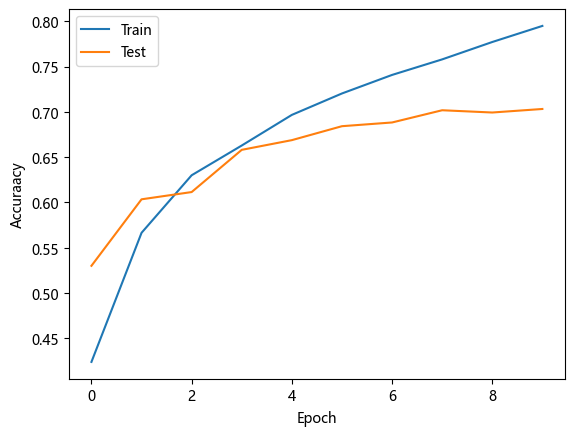

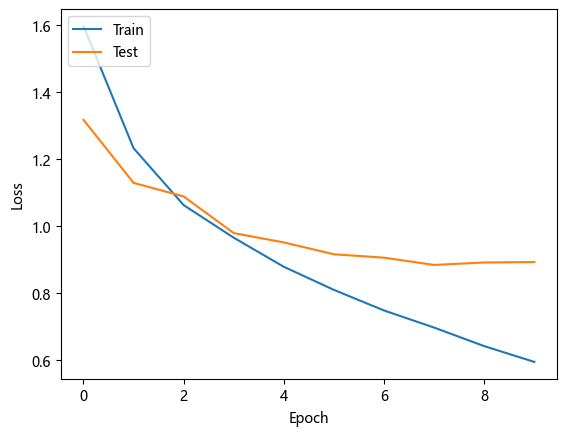

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuraacy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

#### 將數值調整成符合problem1的需求 

目標：accuracy 50%

In [10]:
# Import the necessary libraries
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
# Load the CIFAR-10 dataset
(train_X, train_y), (test_X, test_y) = cifar10.load_data()

# Convert the labels to one-hot encoding
train_y2 = to_categorical(train_y)
test_y2 = to_categorical(test_y)

# Build the model
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.0225)) # Add dropout layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.0225)) # Add dropout layer
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.125)) # Add dropout layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Train the model
history = model.fit(train_X, train_y2, validation_data=(test_X, test_y2), epochs=50, batch_size=1024, verbose=2)

# Evaluate the model
scores = model.evaluate(test_X, test_y2)
print('accurary rate: ', scores[1])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)              

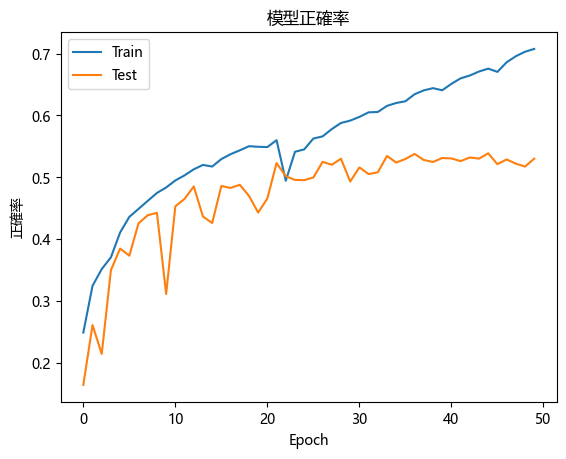

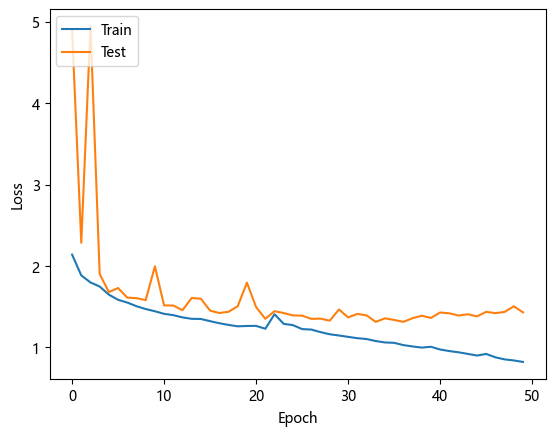

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('模型正確率')
plt.ylabel('正確率')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

#### 將數值調整成符合part.2的需求 

目標：accuracy 75%

In [12]:
# Import the necessary libraries
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.utils import np_utils

# Load the CIFAR-10 dataset
(train_X, train_y), (test_X, test_y) = cifar10.load_data()

# Convert the labels to one-hot encoding
train_y2 = to_categorical(train_y)
test_y2 = to_categorical(test_y)

# Build the model
model = Sequential()
model.add(Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
#model.add(Dropout(0.1))  # Dropout 層
model.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#model.add(Dropout(0.1))  # Dropout 層
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.175))  # Dropout 層
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Train the model
history = model.fit(train_X, train_y2, validation_data=(test_X, test_y2), epochs=50, batch_size=1024, verbose=2)

# Evaluate the model
scores = model.evaluate(test_X, test_y2)
print('accurary rate: ', scores[1])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

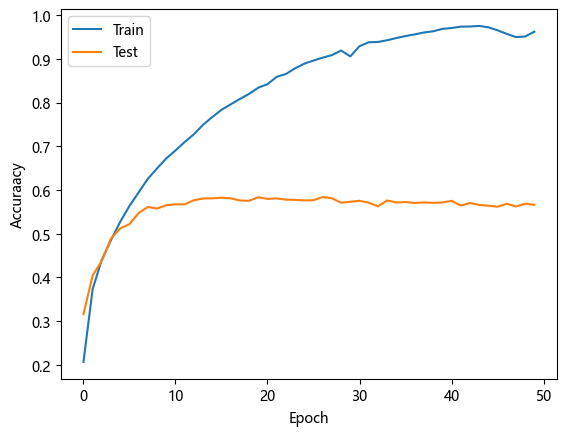

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuraacy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()


#### Conclusion: Overfitting 

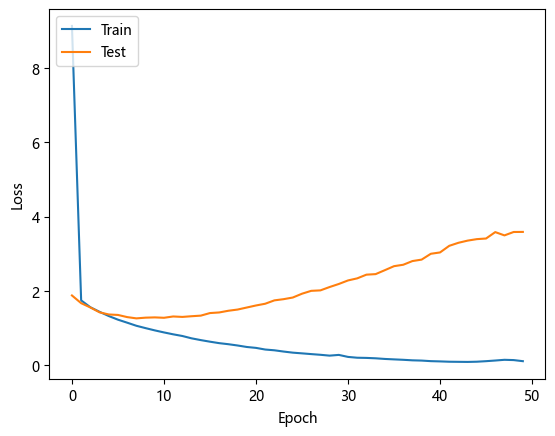

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

目標：accuracy 75 % by CNN

In [15]:
# Import the necessary libraries
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.utils import np_utils

# Load the CIFAR-10 dataset
(train_X, train_y), (test_X, test_y) = cifar10.load_data()

# Convert the labels to one-hot encoding
train_y2 = to_categorical(train_y)
test_y2 = to_categorical(test_y)

# Build the model
model = Sequential()
model.add(Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.1))  # Dropout 層
model.add(Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.1))  # Dropout 層
model.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.1))  # Dropout 層
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.175))  # Dropout 層
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Train the model
history = model.fit(train_X, train_y2, validation_data=(test_X, test_y2), epochs=50, batch_size=1024, verbose=2)

# Evaluate the model
scores = model.evaluate(test_X, test_y2)
print('accurary rate: ', scores[1])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)         

#### 調整strides, kernel size

In [32]:
# Import the necessary libraries
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.utils import np_utils

# Load the CIFAR-10 dataset
(train_X, train_y), (test_X, test_y) = cifar10.load_data()

# Convert the labels to one-hot encoding
train_y2 = to_categorical(train_y)
test_y2 = to_categorical(test_y)

# Build the model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.1))  # Dropout layer

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.1))  # Dropout layer

model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.1))  # Dropout layer

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))  # Dropout layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Train the model
history = model.fit(train_X, train_y2, validation_data=(test_X, test_y2), epochs=50, batch_size=1024, verbose=2)

# Evaluate the model
scores = model.evaluate(test_X, test_y2)
print('accurary rate: ', scores[1])


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_69 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_70 (Dropout)         (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 8, 8, 256)       

#### 實驗組

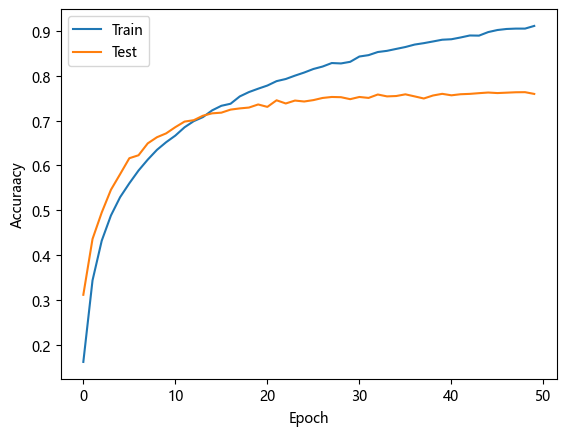

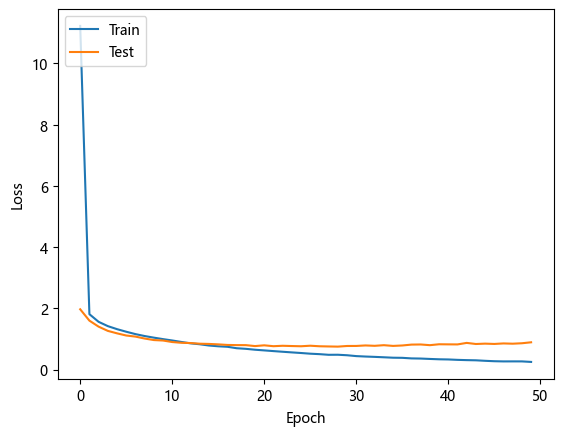

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuraacy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

## Adjusting the hyperparameters:

### (1)epoch = 100, batch_size = 2048(times 2)

In [33]:
# Import the necessary libraries
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.utils import np_utils

# Load the CIFAR-10 dataset
(train_X, train_y), (test_X, test_y) = cifar10.load_data()

# Convert the labels to one-hot encoding
train_y2 = to_categorical(train_y)
test_y2 = to_categorical(test_y)

# Build the model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.1))  # Dropout layer

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.1))  # Dropout layer

model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.1))  # Dropout layer

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))  # Dropout layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Train the model
history = model.fit(train_X, train_y2, validation_data=(test_X, test_y2), epochs=100, batch_size=2048, verbose=2)

# Evaluate the model
scores = model.evaluate(test_X, test_y2)
print('accurary rate: ', scores[1])


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_73 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_74 (Dropout)         (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 8, 8, 256)       

Epoch 63/100
25/25 - 2s - loss: 0.2795 - accuracy: 0.8996 - val_loss: 0.8573 - val_accuracy: 0.7641
Epoch 64/100
25/25 - 2s - loss: 0.2741 - accuracy: 0.9028 - val_loss: 0.8648 - val_accuracy: 0.7652
Epoch 65/100
25/25 - 2s - loss: 0.2711 - accuracy: 0.9030 - val_loss: 0.8620 - val_accuracy: 0.7665
Epoch 66/100
25/25 - 2s - loss: 0.2792 - accuracy: 0.9014 - val_loss: 0.8632 - val_accuracy: 0.7613
Epoch 67/100
25/25 - 2s - loss: 0.2603 - accuracy: 0.9069 - val_loss: 0.8579 - val_accuracy: 0.7650
Epoch 68/100
25/25 - 2s - loss: 0.2547 - accuracy: 0.9093 - val_loss: 0.8610 - val_accuracy: 0.7660
Epoch 69/100
25/25 - 2s - loss: 0.2581 - accuracy: 0.9065 - val_loss: 0.8795 - val_accuracy: 0.7651
Epoch 70/100
25/25 - 2s - loss: 0.2444 - accuracy: 0.9126 - val_loss: 0.9128 - val_accuracy: 0.7629
Epoch 71/100
25/25 - 2s - loss: 0.2478 - accuracy: 0.9107 - val_loss: 0.8878 - val_accuracy: 0.7630
Epoch 72/100
25/25 - 2s - loss: 0.2442 - accuracy: 0.9131 - val_loss: 0.9052 - val_accuracy: 0.7603


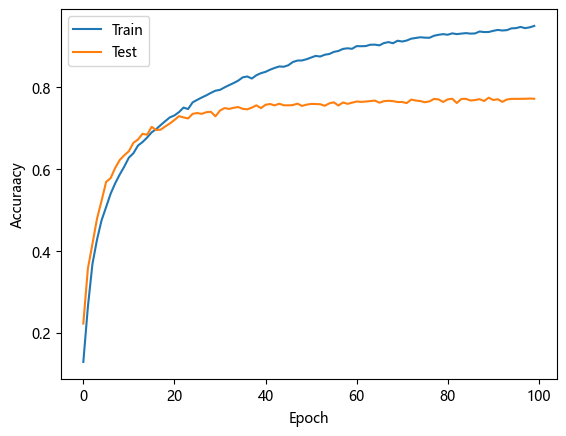

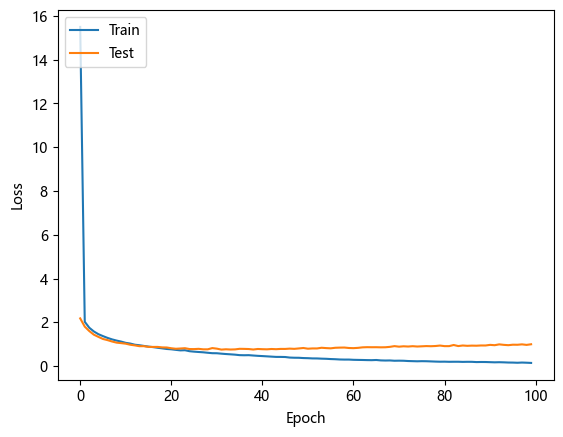

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuraacy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

### (2)2nd layer's kernel size to 5 x 5

In [68]:
# Import the necessary libraries
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.utils import np_utils

# Load the CIFAR-10 dataset
(train_X, train_y), (test_X, test_y) = cifar10.load_data()

# Convert the labels to one-hot encoding
train_y2 = to_categorical(train_y)
test_y2 = to_categorical(test_y)

# Build the model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Dropout(0.2))  # Dropout layer

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Dropout(0.2))  # Dropout layer

model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Dropout(0.2))  # Dropout layer

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  # Dropout layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Train the model
history = model.fit(train_X, train_y2, validation_data=(test_X, test_y2), epochs=200, batch_size=2048, verbose=2)

# Evaluate the model
scores = model.evaluate(test_X, test_y2)
print('accurary rate: ', scores[1])

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_141 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_141 (MaxPoolin (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_158 (Dropout)        (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_142 (Conv2D)          (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_142 (MaxPoolin (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_159 (Dropout)        (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_143 (Conv2D)          (None, 7, 7, 256)       

Epoch 63/200
25/25 - 2s - loss: 0.7167 - accuracy: 0.7489 - val_loss: 0.6928 - val_accuracy: 0.7621
Epoch 64/200
25/25 - 2s - loss: 0.7103 - accuracy: 0.7521 - val_loss: 0.6859 - val_accuracy: 0.7676
Epoch 65/200
25/25 - 2s - loss: 0.6949 - accuracy: 0.7567 - val_loss: 0.6930 - val_accuracy: 0.7627
Epoch 66/200
25/25 - 2s - loss: 0.6985 - accuracy: 0.7564 - val_loss: 0.7026 - val_accuracy: 0.7618
Epoch 67/200
25/25 - 2s - loss: 0.6891 - accuracy: 0.7586 - val_loss: 0.6779 - val_accuracy: 0.7700
Epoch 68/200
25/25 - 2s - loss: 0.6871 - accuracy: 0.7607 - val_loss: 0.6859 - val_accuracy: 0.7638
Epoch 69/200
25/25 - 2s - loss: 0.6759 - accuracy: 0.7629 - val_loss: 0.6793 - val_accuracy: 0.7665
Epoch 70/200
25/25 - 2s - loss: 0.6662 - accuracy: 0.7656 - val_loss: 0.6749 - val_accuracy: 0.7705
Epoch 71/200
25/25 - 2s - loss: 0.6585 - accuracy: 0.7675 - val_loss: 0.6780 - val_accuracy: 0.7688
Epoch 72/200
25/25 - 2s - loss: 0.6644 - accuracy: 0.7670 - val_loss: 0.6703 - val_accuracy: 0.7673


Epoch 145/200
25/25 - 2s - loss: 0.3929 - accuracy: 0.8615 - val_loss: 0.6158 - val_accuracy: 0.7966
Epoch 146/200
25/25 - 2s - loss: 0.3949 - accuracy: 0.8596 - val_loss: 0.6168 - val_accuracy: 0.8012
Epoch 147/200
25/25 - 2s - loss: 0.3969 - accuracy: 0.8607 - val_loss: 0.6195 - val_accuracy: 0.7998
Epoch 148/200
25/25 - 2s - loss: 0.3924 - accuracy: 0.8610 - val_loss: 0.6158 - val_accuracy: 0.8024
Epoch 149/200
25/25 - 2s - loss: 0.3941 - accuracy: 0.8602 - val_loss: 0.6154 - val_accuracy: 0.8003
Epoch 150/200
25/25 - 2s - loss: 0.3925 - accuracy: 0.8624 - val_loss: 0.5988 - val_accuracy: 0.8046
Epoch 151/200
25/25 - 2s - loss: 0.3710 - accuracy: 0.8682 - val_loss: 0.6018 - val_accuracy: 0.8063
Epoch 152/200
25/25 - 2s - loss: 0.3822 - accuracy: 0.8649 - val_loss: 0.6071 - val_accuracy: 0.8064
Epoch 153/200
25/25 - 2s - loss: 0.3904 - accuracy: 0.8630 - val_loss: 0.6162 - val_accuracy: 0.8041
Epoch 154/200
25/25 - 2s - loss: 0.3706 - accuracy: 0.8664 - val_loss: 0.6063 - val_accurac

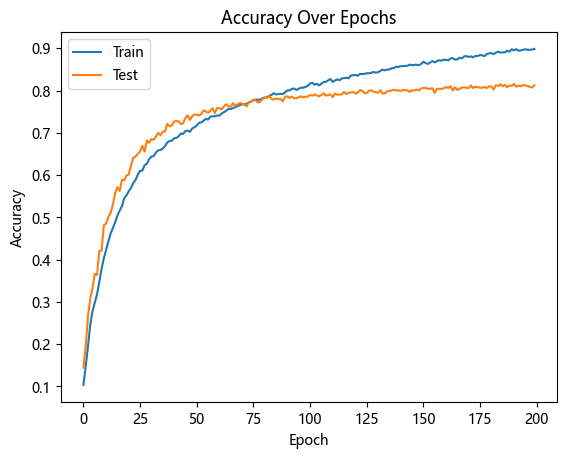

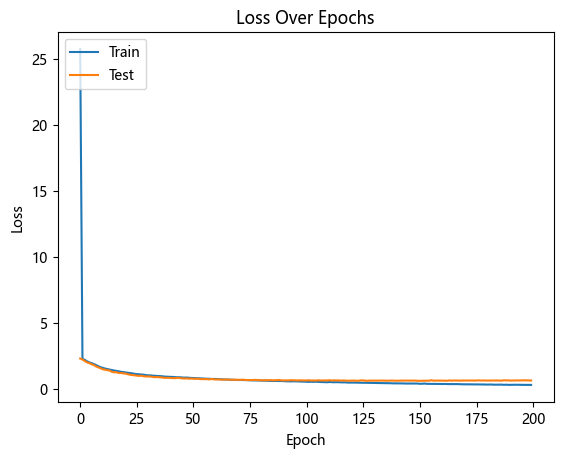

In [70]:

# Plot Accuracy
#plt.figure(figsize=(2, 2))  # 設定圖表大小
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.title('Accuracy Over Epochs')
plt.show()

# Plot Loss
#plt.figure(figsize=(2, 2))  # 設定圖表大小
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.title('Loss Over Epochs')
plt.show()